In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pl.read_parquet("../data/steam_games.parquet")

In [10]:
df.select(["appid", "name"]).write_csv("../data/steam_games.csv")

### Create table for categories

In [12]:
import json

with open("../data/categories.json", "r") as f:
    categories_json = json.load(f)

categories_df = pl.DataFrame(categories_json)
categories_df = categories_df.select(["categoryid", "name"]).rename({"name": "categoryname"})

In [13]:
games_df = df.filter(df["type"] == "game")
games_df

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,"[2, 1, … 62]","[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[]
291550,"""Brawlhalla""","""game""",0,true,"""Minimum:Memory: 2 GB RAMStorag…","""Recommended:Memory: 4 GB RAMNe…",null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""An epic platform fighter for u…","[""English"", ""French"", … ""Turkish""]","""https://shared.akamai.steamsta…","[""Blue Mammoth Games""]","[""Ubisoft""]",null,"[2, 1, … 44]","[""Action"", ""Indie"", ""Free To Play""]",true,true,false,"""17 Oct, 2017""",false,2890,"[298641, 2974360, … 3392630]"
2116250,"""Draft Day Sports: College Foot…","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Prepare to lead your favorite …","""Prepare to lead your favorite …","""Draft Day Sports: College Foot…","[""English""]","""https://shared.akamai.steamsta…","[""Wolverine Studios""]","[""Wolverine Studios""]",53.0,"[2, 62]","[""Indie"", ""Simulation"", … ""Strategy""]",true,false,false,"""31 Aug, 2022""",false,null,[]
946610,"""Pocket Rogues""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<p class=""bb_paragraph""><stron…","""<p class=""bb_paragraph""><stron…","""Pocket Rogues is a dynamic 2D-…","[""English"", ""Russian"", … ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""EtherGaming""]","[""EtherGaming""]",23.0,"[2, 1, … 62]","[""Action"", ""Adventure"", … ""Early Access""]",true,false,false,"""25 Oct, 2018""",false,453,[]
3725490,"""JackKnife""","""game""",0,false,"""Minimum:OS: Windows 10 64-bitP…","""Recommended:OS: Windows 10 or …",null,"""<p class=""bb_paragraph"">Carver…","""<p class=""bb_paragraph"">Carver…","""First Person Shooter with surr…","[""English""]","""https://shared.akamai.steamsta…","[""SlavJankStudios""]","[""SlavJankStudios""]",null,"[2, 62]","[""Action""]",true,false,false,"""July 2025""",true,null,[]
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2894880,"""Misfits""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""Misfits is a cooperative puzzl…","""Misfits is a cooperative puzzl…","""Misfits is a cooperative puzzl…","[""English""]","""https://shared.akamai.steamsta…","[""Tiny Ox""]","[""Tiny Ox""]",null,"[2, 1, … 62]","[""Casual""]",true,true,false,"""To be announced""",true,null,[]
2429930,"""Power Network Tycoon""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph"">Power …","""<p class=""bb_paragraph"">Power …","""Power Network Tycoon is a powe…","[""English"", ""French"", … ""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""David Made This""]","[""David Made This""]",33.5,"[2, 22, … 62]","[""Indie"", ""Simulation"", … ""Early Access""]",true,true,true,"""12 Feb, 2024""",false,null,[]
418670,"""Pankapu""","""game""",0,false,"""Minimum:OS: Vista or higherPro…",null,"""full""","""<h1>More from us</h1><p><img c…","""Jump into a neo-retro adventur…","""Pankapu is a narrative action-…","[""English"", ""French"", … ""Japanese""]","""https://shared.akamai.steamsta…","[""Too Kin

In [8]:
recommended_games = pl.read_parquet("../data/recommended_games.parquet")

In [43]:
recommended_games.filter(recommended_games["appid"] == 1349120)

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
1349120,"""球球少女/Pinball Girls""","""game""",0,false,"""Minimum:OS *: WIN7 SP1/WIN8/WI…",null,null,"""<h1>New Game Coming Soon</h1><…","""<h2 class=""bb_tag"">Introductio…","""&quot;Pinball Girls&quot; is a…","[""Simplified Chinese"", ""English"", ""Traditional Chinese""]","""https://shared.akamai.steamsta…","[""Twilight Sonata Studio""]","[""Twilight Sonata Studio""]",9.5,"[2, 22, … 62]","[""Casual""]",true,false,false,"""17 Feb, 2021""",false,859,"[1424950, 1431390]"


In [9]:
recommended_games.select(["appid", "name"]).write_csv("../data/recommended_games.csv")

In [14]:
games_genres = games_df.explode("genres_list")
games_genres["genres_list"].value_counts().sort(by="count", descending=True)

genres_list,count
str,u32
"""Indie""",72258
"""Action""",43628
"""Adventure""",41862
"""Casual""",41529
"""Simulation""",21582
…,…
"""360 Video""",1
"""Short""",1
"""Tutorial""",1


In [15]:
games_df.filter(games_df["category_ids"].list.len() == 1)

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
3683700,"""Topzerah""","""game""",0,true,"""Minimum:OS *: Windows 7 or lat…",null,null,"""<p class=""bb_paragraph""><i>&qu…","""<p class=""bb_paragraph""><i>&qu…","""A funny 2D bossfight game. Whi…","[""English"", ""Portuguese - Brazil""]","""https://shared.akamai.steamsta…","[""BrenoDev""]","[""BrenoDev""]",null,[2],"[""Action"", ""Adventure"", … ""Free To Play""]",true,true,true,"""2025""",true,null,[]
2742620,"""Memary: Memory of the nameless…","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<h2 class=""bb_tag"">MeMary : Me…","""<h2 class=""bb_tag"">MeMary : Me…","""The mysterious cat offer help …","[""English"", ""Thai""]","""https://shared.akamai.steamsta…","[""AstralSeal""]","[""AstralSeal""]",null,[2],"[""Adventure"", ""Indie""]",true,false,false,"""2 Feb, 2024""",false,null,[]
3637350,"""Game of Life 3D""","""game""",0,false,"""Minimum:OS *: Windows 7 or lat…",null,null,"""<p class=""bb_paragraph"">Game o…","""<p class=""bb_paragraph"">Game o…","""Explore the third dimension of…","[""English""]","""https://shared.akamai.steamsta…","[""Creetah Ltd""]","[""Creetah Ltd""]",12.0,[23],"[""Simulation"", ""Education""]",true,false,false,"""21 Apr, 2025""",false,null,[]
2786250,"""IVRI""","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""IVRI immerses players in a gri…","""IVRI immerses players in a gri…","""IVRI is a space-station explor…","[""English""]","""https://shared.akamai.steamsta…","[""Noah Hutch""]","[""-""]",null,[2],"[""Indie"", ""Free To Play""]",true,false,false,"""14 Mar, 2024""",false,null,[]
2975720,"""巧|合/co|incidence""","""game""",0,true,"""Minimum:OS *: Microsoft Windo…","""Recommended:OS *: Microsoft W…",null,"""<p class=""bb_paragraph"">Game I…","""<p class=""bb_paragraph"">Game I…","""&quot;co|incidence&quot; is a …","[""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""团购规划局""]","[""团购规划局""]",null,[2],"[""Casual"", ""Indie"", ""Free To Play""]",true,false,false,"""4 Jul, 2024""",false,null,[3056130]
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2820400,"""Hare Trigger""","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph""><img c…","""<p class=""bb_paragraph""><img c…","""Play as a bunny with a gun in …","[""English""]","""https://shared.akamai.steamsta…","[""Bemmy Games""]","[""Bemmy Games""]",null,[2],"[""Action"", ""Free To Play""]",true,false,false,"""28 Nov, 2024""",false,null,[]
2521910,"""태백 가문의 사람들 : Prologue""","""game""",0,true,"""Minimum:OS *: Win 7+Processor:…",null,null,"""Sorry. This game is not availa…","""Sorry. This game is not availa…","""유산을 차지하는 건 과연 누가 될 것인가?""","[""Korean""]","""https://shared.akamai.steamsta…","[""C's earth""]","[""C's earth""]",null,[2],"[""Adventure"", ""Casual"", … ""Indie""]",true,false,false,"""11 Aug, 2023""",false,null,[]
3422090,"""BETWEEN""","""game""",0,true,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph"">You ar…","""<p class=""bb_paragraph"">You ar…","""&quot;May you leave no regrets…","[""English"", ""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""CRSTNxiao""]","[""CRSTNxiao""]",null,[2],"[""Casual"", ""Indie"", ""Free To Play""]",true,false,false,"""29 Apr, 2025""",false,null,[]


In [16]:
games_df.filter(games_df["genres_list"].list.len() == 1)

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
3725490,"""JackKnife""","""game""",0,false,"""Minimum:OS: Windows 10 64-bitP…","""Recommended:OS: Windows 10 or …",null,"""<p class=""bb_paragraph"">Carver…","""<p class=""bb_paragraph"">Carver…","""First Person Shooter with surr…","[""English""]","""https://shared.akamai.steamsta…","[""SlavJankStudios""]","[""SlavJankStudios""]",null,"[2, 62]","[""Action""]",true,false,false,"""July 2025""",true,null,[]
1021200,"""Column Taker""","""game""",0,false,"""Minimum:OS: 10Processor: i3Mem…",null,null,"""Welcome to the world of Column…","""Welcome to the world of Column…","""Column Taker a cooperative gam…","[""English""]","""https://shared.akamai.steamsta…","[""Nathan Entertianment""]","[""Nathan Entertainment""]",53.0,"[2, 1, … 62]","[""Casual""]",true,false,false,"""11 Feb, 2019""",false,null,[]
381890,"""Induction""","""game""",0,false,"""Minimum:OS *: Windows 7Memory:…",null,"""full""","""<strong>Induction is an abstra…","""<strong>Induction is an abstra…","""Induction is an abstract puzzl…","[""English"", ""Simplified Chinese"", … ""Traditional Chinese""]","""https://shared.akamai.steamsta…","[""Bryan Gale""]","[""Bryan Gale""]",17.0,"[2, 22, … 62]","[""Indie""]",true,true,true,"""7 Feb, 2017""",false,141,[519070]
2052080,"""Melia's Witch Test""","""game""",0,false,"""Minimum:OS *: Windows® 7/8/10/…",null,"""full""","""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""After an accident, the witch i…","[""Japanese"", ""English"", ""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""うらやまや""]","[""WASABI entertainment""]",12.0,"[2, 28, … 62]","[""RPG""]",true,false,false,"""19 May, 2023""",false,null,[2323480]
677300,"""Ghosts of Miami""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Miami, 1986. An overtasked pol…","""Miami, 1986. An overtasked pol…","""Miami, 1986. Chelo Martínez ha…","[""English"", ""Spanish - Spain"", … ""Simplified Chinese""]","""https://shared.akamai.steamsta…","[""Pillow Fight""]","[""Pillow Fight""]",20.0,"[2, 22, … 62]","[""Adventure""]",true,true,true,"""22 Aug, 2017""",false,null,[]
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1546550,"""Chickenman""","""game""",0,true,"""Minimum:OS: Windows 10Processo…",null,null,"""You play as Chickenman, a stra…","""You play as Chickenman, a stra…","""Be Chickenman and punch those …","[""English""]","""https://shared.akamai.steamsta…","[""Falling Light""]","[""Falling Light""]",null,"[2, 22]","[""Action""]",true,true,false,"""22 Apr, 2021""",false,null,[]
3213540,"""Just Eat The Rich""","""game""",0,false,"""Minimum:OS: 10Processor: Intel…","""Recommended:OS: 11Processor: I…",null,"""<p class=""bb_paragraph""><img c…","""<p class=""bb_paragraph""><img c…","""Take the role of Birdman, a de…","[""English"", ""French"", … ""Vietnamese""]","""https://shared.akamai.steamsta…","[""Birdman""]","[""Birdman""]",14.5,"[2, 1, … 62]","[""Action""]",true,false,false,"""1 Feb, 2025""",false,null,[]
3222220,"""Tree of Dreams""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""He is an adventurer obsessed w…","""He is an adventurer obsessed w…","""You rush into the heart of dan…","[""English""]","""https://shared.akamai.steamsta…","[""BHPG""]","[""BHPG""]",106.0,"[2, 62]","[""Indie""]",true,false,false,"""19 Oct, 2024""",false,null,[]


In [17]:
games_categories = games_df.explode("category_ids").rename({"category_ids": "categoryid"})
games_categories["categoryid"].value_counts().sort(by="count", descending=True)

categoryid,count
i64,u32
2,95996
62,87510
22,46419
28,25333
23,24105
…,…
8,106
16,83
40,36


In [18]:
games_df_cat = games_categories.join(categories_df, on="categoryid", how="left")
games_df_cat

appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,categoryid,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc,categoryname
i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,i64,list[str],bool,bool,bool,str,bool,i64,list[i64],str
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,2,"[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[],"""Single-player"""
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,1,"[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[],"""Multi-player"""
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,9,"[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[],"""Co-op"""
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,38,"[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[],"""Online Co-op"""
2852260,"""Pandarunium""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<strong>Pandarunium</strong> i…","""<strong>Pandarunium</strong> i…","""Team up with friends in this t…","[""English""]","""https://shared.akamai.steamsta…","[""Tenax Studios""]","[""Tenax Studios""]",3.99,22,"[""Casual"", ""Indie""]",true,false,false,"""20 Jun, 2024""",false,null,[],"""Steam Achievements"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3274880,"""Rollick N' Roll""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<h2 class=""bb_tag""><strong>A B…","""<h2 class=""bb_tag""><strong>A B…","""Rollick N' Roll combines fun p…","[""English"", ""French"", … ""Polish""]","""https://shared.akamai.steamsta…","[""Crayonix Games""]","[""Crayonix Games""]",null,2,"[""Action"", ""Casual"", … ""Strategy""]",true,false,false,"""To be announced""",true,null,[],"""Single-player"""
3274880,"""Rollick N' Roll""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<h2 class=""bb_tag""><strong>A B…","""<h2 class=""bb_tag""><strong>A B…","""Rollick N' Roll combines fun p…","[""English"", ""French"", … ""Polish""]","""https://shared.akamai.steamsta…","[""Crayonix Games""]","[""Crayonix Games""]",null,28,"[""Action"", ""Casual"", … ""Strategy""]",true,false,false,"""To be announced""",true,null,[],"""Full Controller Support"""
3274880,"""Rollick N' Roll""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<h2 class=""bb_tag""><strong>A B…","""<h2 class=""bb_tag""><strong>A B…","""Rollick N' Roll combines fun p…","[""English"", ""French"", … ""Polish""]","""https://shared.akamai.steamsta…","[""Cray

In [19]:
cat_freq = games_df_cat.group_by("categoryname").len().sort("len", descending=True)

In [20]:
cat_freq

categoryname,len
str,u32
"""Single-player""",95996
"""Family Sharing""",87510
"""Steam Achievements""",46419
"""Full Controller Support""",25333
"""Steam Cloud""",24105
…,…
"""VAC Enabled""",106
"""Includes Source SDK""",83
"""SteamVR Collectibles""",36


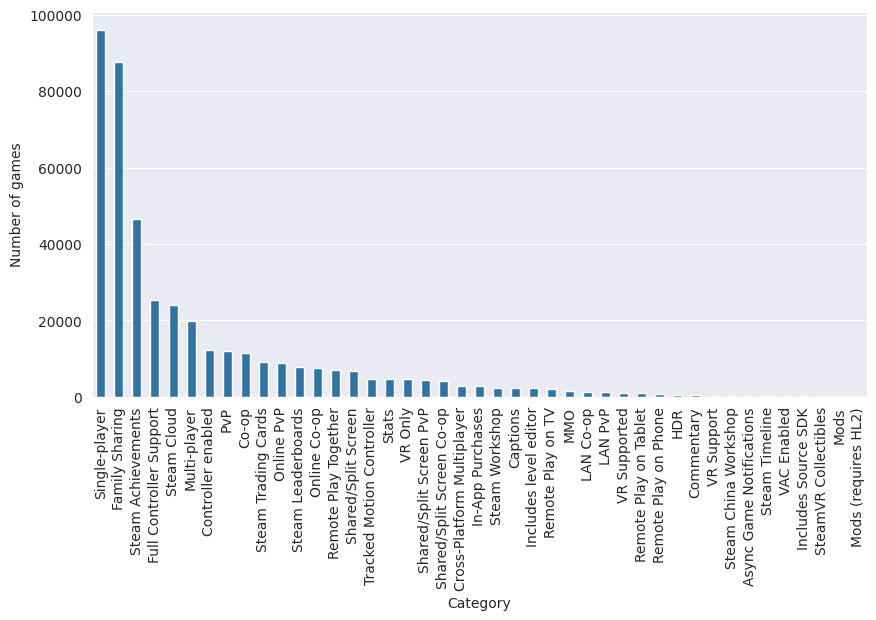

In [21]:
ax = plt.figure(figsize=(10, 5))
sns.barplot(cat_freq, x="categoryname", y="len", width=0.5)
plt.xlabel("Category")
plt.ylabel("Number of games")
plt.xticks(rotation=90)
plt.show()

In [28]:
recommendations = pl.read_parquet("../data/steam_reviews_recent_*.parquet")
recommendations

rec_id,author_id,appid,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,bool,i64,i64,f64,i64,bool,bool,bool,bool
196325495,76561199846967031,730,1195,292,1176,1748972532,"""english""","""trash game""",1748970881,1748970881,true,1,0,0.52381,0,true,false,false,false
196324912,76561199843281427,730,4087,765,4087,1748794944,"""english""","""best game oat, yet the ammount…",1748970288,1748970288,true,0,0,0.5,0,true,false,false,false
196324692,76561198831481801,730,121,70,51,1748979523,"""english""","""great game""",1748970090,1748970090,true,0,0,0.5,0,true,true,false,false
196324478,76561198097774045,730,104140,168,104140,1748968965,"""english""","""downloading 0% go to hell stup…",1748969886,1748969886,false,0,0,0.5,0,true,false,false,false
196323877,76561199630729175,730,5285,311,5235,1748981172,"""english""","""good game""",1748969291,1748969291,true,0,0,0.5,0,true,false,false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
137863029,76561199036598790,1144200,3004,null,1922,1741570558,"""english""","""Great game, hard tho""",1683347870,1683347870,true,0,0,0.5,0,true,false,true,false
137862402,76561199132428677,1144200,807,null,303,1739084514,"""english""","""good game""",1683346587,1683346587,true,0,0,0.5,0,true,false,true,false
137861091,76561198880312535,1144200,603,null,340,1737803077,"""english""","""i break in funny""",1683344131,1683344131,true,1,0,0.52381,0,true,false,true,false


In [42]:
recommendations.filter(recommendations["appid"] == 1349120)

rec_id,author_id,appid,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,bool,i64,i64,f64,i64,bool,bool,bool,bool


In [35]:
total_reviews = recommendations.select(["appid", "review"]).group_by("appid").agg(pl.len().alias("total_reviews"))
total_reviews

appid,total_reviews
i64,u32
1372300,85
909320,883
421700,152
320240,6693
881920,71
…,…
726830,584
230820,933
1265820,1972


In [36]:
recommended_merged = total_reviews.join(recommended_games, on="appid", how="right")
recommended_merged

total_reviews,appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
u32,i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
31000,730,"""Counter-Strike 2""","""game""",0,true,"""Minimum:OS: Windows® 10Process…",null,null,"""For over two decades, Counter-…","""For over two decades, Counter-…","""For over two decades, Counter-…","[""Czech"", ""Danish"", … ""Indonesian""]","""https://shared.akamai.steamsta…","[""Valve""]","[""Valve""]",null,"[1, 27, … 63]","[""Action"", ""Free To Play""]",true,false,true,"""21 Aug, 2012""",false,4518878,[2678630]
462499,271590,"""Grand Theft Auto V Legacy""","""game""",17,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""When a young street hustler, a…","""When a young street hustler, a…","""Grand Theft Auto V for PC offe…","[""English"", ""French"", … ""Spanish - Latin America""]","""https://shared.akamai.steamsta…","[""Rockstar North""]","[""Rockstar Games""]",null,"[2, 1, … 43]","[""Action"", ""Adventure""]",true,false,false,"""13 Apr, 2015""",false,1817907,[]
null,488821,"""Tom Clancy's Rainbow Six® Sieg…","""game""",17,false,"""Minimum:OS: Windows 10, Window…","""Recommended:OS: Windows 10, Wi…","""full""","""<h1>Edition Comparison</h1><p>…","""“One of the best first-person …","""Tom Clancy's Rainbow Six® Sieg…","[""English"", ""French"", … ""Thai""]","""https://shared.akamai.steamsta…","[""Ubisoft Montreal""]","[""Ubisoft""]",74.99,"[2, 1, … 42]","[""Action""]",true,false,false,"""1 Dec, 2015""",false,1188504,"[377560, 417461, … 455572]"
null,488822,"""Tom Clancy's Rainbow Six® Sieg…","""game""",17,false,"""Minimum:OS: Windows 10, Window…","""Recommended:OS: Windows 10, Wi…","""full""","""<h1>Edition Comparison</h1><p>…","""“One of the best first-person …","""Tom Clancy's Rainbow Six® Sieg…","[""English"", ""French"", … ""Thai""]","""https://shared.akamai.steamsta…","[""Ubisoft Montreal""]","[""Ubisoft""]",74.99,"[2, 1, … 42]","[""Action""]",true,false,false,"""1 Dec, 2015""",false,1188041,"[377560, 417461, … 455572]"
null,359550,"""Tom Clancy's Rainbow Six® Sieg…","""game""",17,false,"""Minimum:OS: Windows 10, Window…","""Recommended:OS: Windows 10, Wi…","""full""","""<h1>Edition Comparison</h1><p>…","""“One of the best first-person …","""Tom Clancy's Rainbow Six® Sieg…","[""English"", ""French"", … ""Thai""]","""https://shared.akamai.steamsta…","[""Ubisoft Montreal""]","[""Ubisoft""]",74.99,"[2, 1, … 42]","[""Action""]",true,false,false,"""1 Dec, 2015""",false,1187816,"[377560, 417461, … 455572]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,1362310,"""Zombie Simulator""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""We are zombie hordes. We are o…","""We are zombie hordes. We are o…","""A Huge Wave of Zombies Are Com…","[""English"", ""Russian"", … ""Traditional Chinese""]","""https://shared.akamai.steamsta…","[""ZHANG FAN""]","[""SHEN JIAWEI""]",7.5,"[2, 22, … 62]","[""Action"", ""Indie"", ""Simulation""]",true,true,true,"""24 Feb, 2021""",false,101,[1650000]
null,463070,"""Mecha Ritz: Steel Rondo""","""game""",0,false,"""Minimum:OS *: Windows XPProces…",null,"""full""","""<h2 class=""bb_tag"">Description…","""<h2 class=""bb_tag"">Description…","""Mecha Ritz: Steel Rondo is a v…","[""English"", ""Japanese""]","""https://shared.akamai.steamsta…","[""HEY""]","[""Hanaji Games"", ""Gamera Game""]",31.0,"[2, 28, 62]","[""Action"", ""Indie""]",true,false,true,"""9 Jun, 2016""",false,101,[470870]
null,887340,"""Owl Watch""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""",""

### Appids I should revisit (not enough reviews based on the number of recommendations)

In [37]:
dupes = recommended_merged.filter(recommended_merged["name"].is_duplicated() & recommended_merged["total_reviews"].is_not_null())
dupes

total_reviews,appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
u32,i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
158514,620,"""Portal 2""","""game""",0,false,"""Minimum:OS *: Windows 7 / Vist…",null,"""full""","""Portal 2 draws from the award-…","""Portal 2 draws from the award-…","""The &quot;Perpetual Testing In…","[""English"", ""French"", … ""Ukrainian""]","""https://shared.akamai.steamsta…","[""Valve""]","[""Valve""]",23.0,"[2, 1, … 62]","[""Action"", ""Adventure""]",true,false,true,"""18 Apr, 2011""",false,359511,[323180]
74073,400,"""Portal""","""game""",0,false,""" Minimum: 1.7 GHz Processor…",null,"""full""","""Portal™ is a new single player…","""Portal™ is a new single player…","""Portal™ is a new single player…","[""English"", ""French"", … ""Ukrainian""]","""https://shared.akamai.steamsta…","[""Valve""]","[""Valve""]",23.0,"[2, 22, … 62]","[""Action""]",true,false,true,"""10 Oct, 2007""",false,152993,"[323170, 2012840]"
17700,311210,"""Call of Duty®: Black Ops III""","""game""",17,false,"""Minimum:OS *: Windows 7 64-Bit…",null,"""full""","""<h1>Zombies Chronicles Deluxe …","""Call of Duty®: Black Ops III Z…","""Call of Duty®: Black Ops III Z…","[""English"", ""French"", … ""Russian""]","""https://shared.akamai.steamsta…","[""Treyarch"", ""Aspyr (Mac)""]","[""Activision"", ""Aspyr (Mac)""]",217.0,"[2, 1, … 62]","[""Action"", ""Adventure""]",true,true,false,"""5 Nov, 2015""",false,140218,"[581450, 366843, … 830461]"
8248,1449560,"""Metro Exodus""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""Flee the shattered ruins of th…","[""English"", ""French"", … ""Japanese""]","""https://shared.akamai.steamsta…","[""4A Games""]","[""Deep Silver""]",75.0,"[2, 22, … 62]","[""Action""]",true,true,true,"""14 Feb, 2020""",false,104831,"[924220, 889921, 889920]"
31694,412020,"""Metro Exodus""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""Flee the shattered ruins of th…","[""English"", ""French"", … ""Japanese""]","""https://shared.akamai.steamsta…","[""4A Games""]","[""Deep Silver""]",75.0,"[2, 22, … 62]","[""Action""]",true,true,true,"""14 Feb, 2020""",false,104827,"[924220, 889921, 889920]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
23,2540,"""RIP - Trilogy™""","""game""",0,false,"""Minimum: Windows XP/2000, 1 GH…",null,null,"""With the completion of the thi…","""With the completion of the thi…","""With the completion of the thi…","[""English""]","""https://shared.akamai.steamsta…","[""Elephant Games""]",[],14.95,"[2, 1, … 62]","[""Casual"", ""Indie""]",true,false,false,"""1 Jun, 2007""",false,244,[]
84,31100,"""Wallace & Gromit’s Grand Adven…","""game""",0,false,"""Operating System: Microsoft® W…",null,null,"""Enter the colorful world of We…","""Enter the colorful world of We…","""Enter the colorful world of We…","[""English (full audio)"", ""French"", … ""English""]","""https://shared.akamai.steamsta…","[""Telltale""]","[""Telltale""]",31.0,"[2, 62]","[""Adventure"", ""Casual""]",true,false,false,"""23 Mar, 2009""",false,240,[]
32,844040,"""RUSH""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<img class=""bb_img"" src=""https…","""<img class=""bb_img"" src=""https…","""Are you ready for the ultimate…","[""English""]","""https://shared.akamai.steamsta…","[""The Binary Mill""]","[""The Binary Mill""]",37.0,"[2, 1, … 62]","["

In [38]:
no_reviews = recommended_merged.filter(recommended_merged["total_reviews"].is_null() & ~recommended_merged["name"].is_duplicated())
no_reviews

total_reviews,appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
u32,i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
null,22380,"""Fallout: New Vegas""","""game""",16,false,"""OS *: Windows 7/Vista/XP …",null,null,"""Welcome to Vegas. New Vegas.<b…","""Welcome to Vegas. New Vegas.<b…","""Welcome to Vegas. New Vegas. E…","[""English"", ""French"", … ""Spanish - Spain""]","""https://shared.akamai.steamsta…","[""Obsidian Entertainment""]","[""Bethesda Softworks""]",29.0,"[2, 22, … 62]","[""Action"", ""RPG""]",true,false,false,"""19 Oct, 2010""",false,182594,"[72840, 72760, … 22470]"
null,782330,"""DOOM Eternal""","""game""",17,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<h1>Feature List</h1><p><img c…","""Hell’s armies have invaded Ear…","""Hell’s armies have invaded Ear…","[""English"", ""French"", … ""Russian""]","""https://shared.akamai.steamsta…","[""id Software""]","[""Bethesda Softworks""]",119.0,"[2, 1, … 62]","[""Action""]",true,false,false,"""19 Mar, 2020""",false,177414,"[1098292, 1098293, … 1460021]"
null,427520,"""Factorio""","""game""",0,false,"""Minimum:OS: Windows 11, 10Proc…","""Recommended:OS: Windows 11, 10…",null,"""<strong>Factorio</strong> is a…","""<strong>Factorio</strong> is a…","""Factorio is a game about build…","[""English"", ""French"", … ""Georgian""]","""https://shared.akamai.steamsta…","[""Wube Software LTD.""]","[""Wube Software LTD.""]",70.0,"[2, 1, … 62]","[""Casual"", ""Indie"", … ""Strategy""]",true,true,true,"""14 Aug, 2020""",false,174623,"[645390, 436090, 3311770]"
null,1332010,"""Stray""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""Lost, alone and separated from…","""Lost, alone and separated from…","""Lost, alone and separated from…","[""English"", ""French"", … ""Portuguese - Portugal""]","""https://shared.akamai.steamsta…","[""BlueTwelve Studio""]","[""Annapurna Interactive""]",64.0,"[2, 22, … 62]","[""Adventure"", ""Indie""]",true,true,false,"""19 Jul, 2022""",false,139163,[2086160]
null,2246340,"""Monster Hunter Wilds""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …","""full""","""<h1>Deluxe Edition and Premium…","""The unbridled force of nature …","""The unbridled force of nature …","[""English"", ""French"", … ""Korean""]","""https://shared.akamai.steamsta…","[""CAPCOM Co., Ltd.""]","[""CAPCOM Co., Ltd.""]",255.0,"[2, 1, … 62]","[""Action"", ""Adventure"", ""RPG""]",true,false,false,"""27 Feb, 2025""",false,131911,"[3308900, 3289630, … 3410850]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,1362310,"""Zombie Simulator""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""We are zombie hordes. We are o…","""We are zombie hordes. We are o…","""A Huge Wave of Zombies Are Com…","[""English"", ""Russian"", … ""Traditional Chinese""]","""https://shared.akamai.steamsta…","[""ZHANG FAN""]","[""SHEN JIAWEI""]",7.5,"[2, 22, … 62]","[""Action"", ""Indie"", ""Simulation""]",true,true,true,"""24 Feb, 2021""",false,101,[1650000]
null,463070,"""Mecha Ritz: Steel Rondo""","""game""",0,false,"""Minimum:OS *: Windows XPProces…",null,"""full""","""<h2 class=""bb_tag"">Description…","""<h2 class=""bb_tag"">Description…","""Mecha Ritz: Steel Rondo is a v…","[""English"", ""Japanese""]","""https://shared.akamai.steamsta…","[""HEY""]","[""Hanaji Games"", ""Gamera Game""]",31.0,"[2, 28, 62]","[""Action"", ""Indie""]",true,false,true,"""9 Jun, 2016""",false,101,[470870]
null,887340,"""Owl Watch""","""game""",0,false,"""Minimum:Requires 

In [40]:
no_reviews.write_parquet("../data/no_reviews.parquet")

In [82]:
not_enough_reviews = recommended_merged.filter((recommended_merged["total_reviews"] < 10000) & (recommended_merged["recommendations"] > 10000))
not_enough_reviews.sort("total_reviews", descending=True)

total_reviews,appid,name,type,required_age,is_free,minimum_pc_requirements,recommended_pc_requirements,controller_support,detailed_description,about_the_game,short_description,supported_languages,header_image,developers,publishers,price,category_ids,genres_list,windows_support,mac_support,linux_support,release_date,coming_soon,recommendations,dlc
u32,i64,str,str,i64,bool,str,str,str,str,str,str,list[str],str,list[str],list[str],f64,list[i64],list[str],bool,bool,bool,str,bool,i64,list[i64]
9994,7940,"""Call of Duty® 4: Modern Warfar…","""game""",17,false,"""Minimum: Supported OS: Mi…",null,null,"""The new action-thriller from t…","""The new action-thriller from t…","""The new action-thriller from t…","[""English"", ""French"", … ""Spanish - Spain""]","""https://shared.akamai.steamsta…","[""Infinity Ward""]","[""Activision""]",73.0,"[2, 1, 62]","[""Action""]",true,true,false,"""12 Nov, 2007""",false,20137,[]
9900,824270,"""KovaaK's""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph""><img c…","""<p class=""bb_paragraph""><img c…","""Master your aim with KovaaK’s,…","[""English"", ""Portuguese - Brazil"", … ""Vietnamese""]","""https://shared.akamai.steamsta…","[""KovaaK Games""]","[""KovaaK Games""]",22.0,"[2, 22, … 62]","[""Action"", ""Indie"", ""Simulation""]",true,false,false,"""3 Apr, 2018""",false,32139,"[2633870, 1438210]"
9891,1940340,"""Darkest Dungeon® II""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<h1>Just Updated</h1><p><img c…","""Darkest Dungeon II is a roguel…","""Darkest Dungeon II is a roguel…","[""English"", ""French"", … ""Traditional Chinese""]","""https://shared.akamai.steamsta…","[""Red Hook Studios""]","[""Red Hook Studios""]",77.0,"[2, 22, … 62]","[""Indie"", ""RPG"", ""Strategy""]",true,true,false,"""8 May, 2023""",false,19745,"[2393240, 2598510, … 3591040]"
9870,1987080,"""Inside the Backrooms""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=""bb_paragraph""><img c…","""<p class=""bb_paragraph""><img c…","""Inside the Backrooms is a horr…","[""English"", ""Spanish - Spain"", … ""German""]","""https://shared.akamai.steamsta…","[""MrFatcat""]","[""MrFatcat"", ""Dropsiick""]",19.0,"[2, 1, … 62]","[""Adventure"", ""Indie"", ""Early Access""]",true,false,false,"""20 Jun, 2022""",false,37272,[]
9836,657200,"""Hand Simulator""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""Hand Simulator is a game in wh…","""Hand Simulator is a game in wh…","""There are many different level…","[""English""]","""https://shared.akamai.steamsta…","[""HFM Games""]","[""HFM Games""]",7.5,"[2, 1, … 62]","[""Simulation""]",true,false,false,"""18 Jul, 2017""",false,28685,[]
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
300,682990,"""Drug Dealer Simulator""","""game""",0,false,"""Minimum:OS *: Windows 7 64-bit…",null,null,"""<h1>DDS UNIVERSE</h1><p><img c…","""<p class=""bb_paragraph""><img c…","""Have you ever considered creat…","[""English"", ""French"", … ""Portuguese - Portugal""]","""https://shared.akamai.steamsta…","[""Byterunners""]","[""Movie Games S.A.""]",37.0,"[2, 62]","[""Action"", ""Adventure"", … ""Simulation""]",true,false,false,"""16 Apr, 2020""",false,20839,[]
299,294100,"""RimWorld""","""game""",0,false,"""Minimum:OS *: Windows 7Process…",null,null,"""<strong>RimWorld is a sci-fi c…","""<strong>RimWorld is a sci-fi c…","""A sci-fi colony sim driven by …","[""English"", ""French"", … ""Spanish - Latin America""]","""https://shared.akamai.steamsta…","[""Ludeon Studios""]","[""Ludeon Studios""]",67.0,"[2, 30, … 62]","[""Indie"", ""Simulation"", ""Strategy""]",true,true,true,"""17 Oct, 2018""",false,177708,"[2380740, 1826140, … 1244270]"
210,1483870,"""Draw & Guess""","""game""",0,false,"""Minimum:Requires a 64-bit proc…","""Recommended:Requires a 64-bit …",null,"""<p class=

## Use steam_reviews parquet files

In [11]:
steam_reviews = pl.read_parquet("../data/steam_reviews_0.parquet")
steam_reviews[-1]

rec_id,author_id,appid,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,bool,i64,i64,f64,i64,bool,bool,bool,bool
25971597,76561198163033491,431960,180,null,49,1671041081,"""english""","""first! awsome work dude 15/10""",1476128348,1476128348,true,8,0,0.508065,0,true,false,true,false
